In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### combine each event to one file

In [ ]:
path = '../2015/singleTypes-all-chunks2/global event/'
for file in os.listdir(path):
    df_all = pd.DataFrame(columns=['LogSource', 'eventType', 'id', 'jobId', 'taskId', 'attemptID', 
                                   'nodeNumber', 'timestamp', 'lowerBound', 'upperBound', 'originalEventId', 'value'])
    for filename in os.listdir(path+file+'/'):
        df = pd.read_csv(path+file+'/'+filename)
        df_all = pd.concat([df_all, df])
    print (df_all.shape)
    df_all.to_csv(file+".csv", index=False)

In [ ]:
path = '../2015/singleTypes-all-chunks2/multi-nodes event/'
for file in os.listdir(path):
    df_all = pd.DataFrame(columns=['LogSource', 'eventType', 'id', 'nodeNumber', 'timestamp', 
                                   'lowerBound', 'upperBound', 'originalEventId', 'value'])
    for filename in os.listdir(path+file+'/'):
        df = pd.read_csv(path+file+'/'+filename)
        df_all = pd.concat([df_all, df])
    print (df_all.shape)
    df_all.to_csv(file+".csv", index=False)

In [ ]:
path = '../2015/singleTypes-all-chunks2/multi-nodes multi-tasks/'
for file in os.listdir(path):
    df_all = pd.DataFrame(columns=['LogSource', 'eventType', 'id', 'jobId', 'taskId', 'attemptID', 
                                   'nodeNumber', 'timestamp', 'lowerBound', 'upperBound', 'originalEventId', 'value'])
    for filename in os.listdir(path+file+'/'):
        df = pd.read_csv(path+file+'/'+filename)
        df_all = pd.concat([df_all, df])
    print (df_all.shape)
    df_all.to_csv(file+".csv", index=False)

In [ ]:
path = '../2015/singleTypes-all-chunks2/single node event/'
for file in os.listdir(path):
    df_all = pd.DataFrame(columns=['LogSource', 'eventType', 'id', 'nodeNumber', 'timestamp', 
                                   'lowerBound', 'upperBound', 'originalEventId', 'value'])
    for filename in os.listdir(path+file+'/'):
        df = pd.read_csv(path+file+'/'+filename)
        df_all = pd.concat([df_all, df])
    print (df_all.shape)
    df_all.to_csv(file+".csv", index=False)

In [ ]:
path = '../2015/singleTypes-all-chunks2/single node multi-tasks/'
for file in os.listdir(path):
    df_all = pd.DataFrame(columns=['LogSource', 'eventType', 'id', 'jobId', 'taskId', 'attemptID', 
                                   'nodeNumber', 'timestamp', 'lowerBound', 'upperBound', 'originalEventId', 'value'])
    for filename in os.listdir(path+file+'/'):
        df = pd.read_csv(path+file+'/'+filename)
        df_all = pd.concat([df_all, df])
    print (df_all.shape)
    df_all.to_csv(file+".csv", index=False)

In [ ]:
path = '../2015/singleTypes-all-chunks2/'
file_list = []
for file in os.listdir(path):
    if file != '.DS_Store':
        file_list = file_list + os.listdir(path+file+'/')
print (len(file_list))
print (file_list)

### extract useful attributes
use only 4 attributes

for one node,  different taskId has different timestamp, so timestamp is enough for distinguish

In [ ]:
# extract useful info
for file in os.listdir():
    if file[-3:]=='csv':
        df = pd.read_csv(file)
        print (file)
        print (df.columns)
#         print (df.lowerBound.unique())
#         print (df.upperBound.unique())
#         print (df.originalEventId.unique())
#         print (df.LogSource.unique())
        df = df.loc[:,['eventType', 'nodeNumber', 'timestamp', 'value']]
        df.to_csv(file, index=False)

### combine different files into one matrix

In [ ]:
# combine
df_all = pd.DataFrame(columns=['eventType', 'nodeNumber', 'timestamp', 'value'])
for file in os.listdir():
    if file[-3:]=='csv':
        print (file)
        df = pd.read_csv(file)
        df_all= pd.concat([df_all, df])
print (df_all.shape)

df_all = df_all.set_index('timestamp')
print (df_all.shape)
df_all = df_all.reset_index()
df_all = df_all.sort_values(by=['timestamp', 'nodeNumber'])
df_all = df_all.loc[:,['timestamp', 'nodeNumber', 'eventType', 'value']]
df_all.to_csv('all.csv', index=False)

### create vectors of timestamp with features' values null

In [ ]:
df_all = pd.read_csv('all.csv')
df = pd.DataFrame(np.sort(df_all.timestamp.unique()), columns=['timestamp'])

In [ ]:
list_node = df_all.nodeNumber.unique()
list_event = df_all.eventType.unique()
# list_attribute = []
for n in list_node:
    for e in list_event:
        attribute = 'node_'+str(n)+'_'+e
        df[attribute] = np.NaN
#         list_attribute.append(attribute)
# print (len(list_attribute))
df.to_csv('converted.csv', index=False)

### fill in features' values of timestamp vectors 

In [ ]:
df = pd.read_csv('converted.csv')

In [ ]:
list_timestamp = np.sort(df_all.timestamp.unique())
for t in len(list_timestamp):
    tmp = df_all[df_all.timestamp==list_timestamp[t]]
    df.loc[t] = 0
    for r in range(tmp.shape[0]):
        n = tmp.iloc[i,'nodeNumber']
        e = tmp.iloc[i,'eventType']
        attribute = 'node_'+str(n)+'_'+e

In [ ]:
df_all = pd.read_csv('all.csv') 
df = pd.read_csv('converted.csv')
df = df.set_index('timestamp')
for i in range(df_all.shape[0]):
    t = df_all.iloc[i, 'timestamp']
    n = df_all.iloc[i, 'nodeNumber']
    e = df_all.iloc[i, 'eventType']
    v = df_all.iloc[i, 'value']
    attribute = 'node_'+str(n)+'_'+e
    df.iloc[t, attribute] = v
df = df.reset_index()
df.to_csv('assigned.csv', index=False)

### info of rows and columns

In [55]:
cols = open('columns_nan.txt', 'r')
list_col = list(map(lambda x: int(x[:-1]), cols.readlines()))

print (len(np.unique(list_col)))
print (np.unique(list_col))

lc = []
for el in np.unique(list_col):
    lc.append(list_col.count(el))
print (len(lc))
print (lc)

78
[      0 2406627 4263571 5394832 5397562 5398150 5399326 5401646 5402911
 5404223 5404348 5408757 5412406 5489685 5489686 5489687 5489688 5489689
 5489690 5489691 5489692 5489693 5489695 5489696 5489697 5489698 5489699
 5489700 5489701 5489702 5489703 5489704 5489705 5489706 5489707 5489721
 5505385 5505386 5566475 5566591 5566787 5566939 5566965 5567052 5567115
 5567171 5567224 5567237 5567288 5567402 5567428 5567433 5567486 5567661
 5567674 5567683 5567688 5567740 5567756 5567817 5567888 5567996 5568050
 5568073 5568114 5568315 5568381 5569462 5569724 5569778 5569959 5570081
 5570082 5570153 5570316 5570330 5570570 5580419]
78
[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 32, 5, 7, 9, 53, 5, 28, 12, 17, 2, 2, 1, 1, 9, 5, 17, 9, 2, 17, 32, 14, 1, 3, 13, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 106]


### features with values all null

In [56]:
col_to_delete = []
for i in range(len(list_col)):
    if list_col[i] == 5580419:
        col_to_delete.append(i)

In [60]:
len(col_to_delete)

106

### timestamp vectors with null values

In [120]:
rows = open('rows_nan.txt', 'r')
list_row = list(map(lambda x: int(x[:-1]), rows.readlines()))
print (len(list_row))
print (len(np.unique(list_row)))
print (np.unique(list_row))

lr = []
for el in np.unique(list_row):
    lr.append(list_row.count(el))
print (lr)

nan479 = open('rows_nan479.txt', 'w')
nan478 = open('rows_nan478.txt', 'w')
for i in range(len(list_row)):
    el = list_row[i]
    if el==479:
        nan479.write(str(ts.iloc[i,0])+' '+str(i)+'\n')
    if el==478:
        nan478.write(str(ts.iloc[i,0])+' '+str(i)+'\n')

5580419
49
[162 163 164 165 166 167 168 169 182 197 200 219 236 238 247 249 264 269
 278 279 280 282 285 299 313 315 329 330 334 350 372 374 397 433 436 443
 448 461 469 470 471 472 473 474 475 476 477 478 479]
[1, 2, 7, 12, 22, 71, 240, 74661, 1, 15681, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 10, 89, 521, 2208, 7799, 24813, 71064, 162327, 293010, 1166244, 3761595]


In [125]:
sum(lr)

5580419

### info of timestamp

In [119]:
ts = pd.read_csv('timestamps.csv')
print (ts.shape)
# ts['timestamp'] = (ts['timestamp']-1427515215000)

(5580419, 1)


In [115]:
max(ts.timestamp)

1364385000

In [116]:
min(ts.timestamp)

0

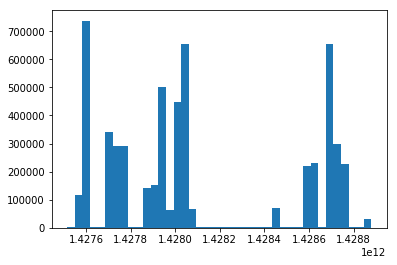

In [76]:
fig, ax = plt.subplots()
ax.hist(ts.timestamp,40)
plt.show()

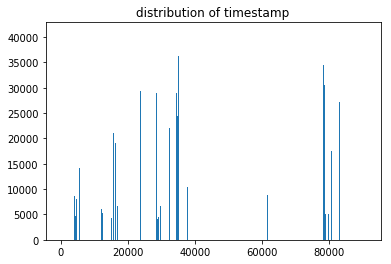

In [124]:
fig, ax = plt.subplots()
ax.hist((ts.timestamp-1427515215000)/15000,5000)
ax.set_title('distribution of timestamp')
plt.show()

### merge interval points to representation points

In [6]:
rep_idx = -1
to_merge = []

chunks = pd.read_csv('deleted.csv', iterator=True, chunksize=10000)
for df in chunks:
    row_idx = 0
    res = pd.read_csv('deleted.csv', nrows=0)
    for i in range(df.shape[0]):
        ts_mod = (df.iloc[i,0]-1427515215000)%15000
        commun_idx = int((df.iloc[i,0]-1427515215000)/15000)
#         print (str(commun_idx)+'   '+str(ts_mod))

        # not the first representation
        if ts_mod == 0 and commun_idx != rep_idx and rep_idx != -1:
#             print ('add merged rep')
            if len(to_merge)>1:
                tmp = pd.concat(to_merge)
                print (tmp.shape)
                res.loc[row_idx] = tmp.mean(axis=0,skipna=True)
            elif len(to_merge)==1:
                res.loc[row_idx] = to_merge[0].iloc[0,:]
            else:
                print ('False!!!')
            res.iloc[row_idx,0] = rep_idx
            row_idx += 1
            to_merge = []

        # interval of this representation
#         if ts_mod != 0 and commun_idx == rep_idx:
#             print ('merge interval')

        # interval not of this representation
        if ts_mod != 0 and commun_idx != rep_idx:
            print ('lack of representation !')
            if len(to_merge)>1:
                tmp = pd.concat(to_merge)
                print (tmp.shape)
                res.loc[row_idx] = tmp.mean(axis=0,skipna=True)
            elif len(to_merge)==1:
                res.loc[row_idx] = to_merge[0].iloc[0,:]
            else:
                print ('False!!!')
            res.iloc[row_idx,0] = rep_idx
            row_idx += 1
            to_merge = []

        # final line, same case of representation
        if df.iloc[i,0] == 1428879600000:
            to_merge.append(pd.DataFrame(df.iloc[[i],:]))
            rep_idx = commun_idx
            if len(to_merge)>1:
                tmp = pd.concat(to_merge)
                print (tmp.shape)
                res.loc[row_idx] = tmp.mean(axis=0,skipna=True)
            elif len(to_merge)==1:
                res.loc[row_idx] = to_merge[0].iloc[0,:]
            else:
                print ('False!!!')
            res.iloc[row_idx,0] = rep_idx
            print ('add merged rep and finish')

        rep_idx = commun_idx
        to_merge.append(pd.DataFrame(df.iloc[[i],:]))
        
#     print (res.shape)
    print ('chunk output')
    res.to_csv('merged.csv', index=False, mode='a')

(65, 375)
(16, 375)
(431, 375)
(251, 375)
(279, 375)
(30, 375)
(406, 375)
(418, 375)
(241, 375)
(730, 375)
(456, 375)
(650, 375)
(527, 375)
(555, 375)
(401, 375)
(210, 375)
(293, 375)
chunk output
(280, 375)
(418, 375)
(436, 375)
(559, 375)
(366, 375)
(436, 375)
(393, 375)
(606, 375)
(345, 375)
(439, 375)
(510, 375)
(437, 375)
(384, 375)
(510, 375)
(509, 375)
(567, 375)
(357, 375)
(441, 375)
(569, 375)
(497, 375)
(437, 375)
chunk output
(540, 375)
(587, 375)
(436, 375)
(426, 375)
(567, 375)
lack of representation !
(420, 375)
(470, 375)
(539, 375)
(200, 375)
(287, 375)
(317, 375)
(160, 375)
(261, 375)
(286, 375)
(253, 375)
(209, 375)
(297, 375)
(321, 375)
(293, 375)
(189, 375)
(226, 375)
(343, 375)
(272, 375)
(365, 375)
(391, 375)
(247, 375)
(425, 375)
(280, 375)
(255, 375)
(340, 375)
(317, 375)
chunk output
(302, 375)
(366, 375)
(375, 375)
(351, 375)
(377, 375)
(474, 375)
(266, 375)
(491, 375)
(279, 375)
(306, 375)
(214, 375)
(342, 375)
(254, 375)
(199, 375)
(293, 375)
(123, 375)
(237

(1532, 375)
(1447, 375)
(1253, 375)
(1550, 375)
chunk output
(1321, 375)
(1285, 375)
(1593, 375)
(1326, 375)
(1375, 375)
(1690, 375)
(1296, 375)
chunk output
(1699, 375)
(1654, 375)
(1588, 375)
(1727, 375)
(1584, 375)
(1539, 375)
chunk output
(1622, 375)
(1671, 375)
(1559, 375)
(1636, 375)
(1649, 375)
(1786, 375)
chunk output
(1566, 375)
(1700, 375)
(1678, 375)
(1543, 375)
(1698, 375)
(1444, 375)
chunk output
(1728, 375)
(1467, 375)
(1498, 375)
(1448, 375)
(1535, 375)
(1579, 375)
(1642, 375)
chunk output
(1639, 375)
(1567, 375)
(1640, 375)
(1344, 375)
(1259, 375)
(1377, 375)
(1141, 375)
chunk output
(1204, 375)
(1212, 375)
(1086, 375)
(943, 375)
(660, 375)
(50, 375)
(31, 375)
(4, 375)
(2, 375)
(80, 375)
(615, 375)
(928, 375)
(721, 375)
(824, 375)
(718, 375)
chunk output
(4765, 375)
(3449, 375)
(2776, 375)
chunk output
(1984, 375)
(1906, 375)
(1915, 375)
(1957, 375)
(1980, 375)
chunk output
(1998, 375)
(1988, 375)
(2213, 375)
(1832, 375)
(1895, 375)
chunk output
(1880, 375)
(1929, 375)


(918, 375)
(875, 375)
(971, 375)
(897, 375)
(905, 375)
(798, 375)
(636, 375)
(622, 375)
chunk output
(691, 375)
(241, 375)
(4, 375)
(2, 375)
(4, 375)
(72, 375)
(119, 375)
(135, 375)
(119, 375)
(253, 375)
(99, 375)
(119, 375)
(135, 375)
(135, 375)
(138, 375)
(184, 375)
(100, 375)
(78, 375)
(94, 375)
(238, 375)
(557, 375)
(416, 375)
(454, 375)
(326, 375)
(291, 375)
(296, 375)
(287, 375)
(337, 375)
(338, 375)
(412, 375)
(402, 375)
(392, 375)
(378, 375)
(367, 375)
(520, 375)
(372, 375)
(389, 375)
(437, 375)
chunk output
(430, 375)
(359, 375)
(417, 375)
(346, 375)
(465, 375)
(337, 375)
(495, 375)
(407, 375)
(454, 375)
(366, 375)
(476, 375)
(437, 375)
(427, 375)
(387, 375)
(440, 375)
(423, 375)
(441, 375)
(455, 375)
(341, 375)
(434, 375)
(376, 375)
(404, 375)
(240, 375)
(186, 375)
(130, 375)
(203, 375)
chunk output
(445, 375)
(157, 375)
(119, 375)
(61, 375)
(259, 375)
(225, 375)
(215, 375)
(171, 375)
(200, 375)
(214, 375)
(208, 375)
(236, 375)
(179, 375)
(138, 375)
(143, 375)
(176, 375)
(77,

(1079, 375)
(1155, 375)
chunk output
(1042, 375)
(918, 375)
(1547, 375)
(1155, 375)
(1389, 375)
(1234, 375)
(1025, 375)
(1283, 375)
(1261, 375)
chunk output
(1231, 375)
(1258, 375)
(1148, 375)
(962, 375)
(1051, 375)
(1312, 375)
(719, 375)
(1020, 375)
(1014, 375)
chunk output
(937, 375)
(1459, 375)
(987, 375)
(841, 375)
(615, 375)
(1078, 375)
(1373, 375)
(932, 375)
(1044, 375)
(659, 375)
chunk output
(1459, 375)
(1041, 375)
(718, 375)
(659, 375)
(617, 375)
(798, 375)
(1201, 375)
(1107, 375)
(1055, 375)
(855, 375)
(778, 375)
chunk output
(1077, 375)
(962, 375)
(913, 375)
(1027, 375)
(1212, 375)
(775, 375)
(425, 375)
(996, 375)
(567, 375)
(456, 375)
(826, 375)
(744, 375)
(64, 375)
chunk output
(346, 375)
(738, 375)
(259, 375)
(269, 375)
(664, 375)
(471, 375)
(68, 375)
(167, 375)
(5, 375)
(27, 375)
(165, 375)
(356, 375)
(9, 375)
(46, 375)
(2, 375)
(13, 375)
(167, 375)
(283, 375)
(94, 375)
(33, 375)
(109, 375)
(125, 375)
(259, 375)
(592, 375)
(544, 375)
(598, 375)
(949, 375)
chunk output
(3

chunk output
(1301, 375)
(1385, 375)
(1330, 375)
(1154, 375)
(1150, 375)
(1125, 375)
(1273, 375)
(1463, 375)
chunk output
(1204, 375)
(335, 375)
(264, 375)
(272, 375)
(260, 375)
(270, 375)
(259, 375)
(277, 375)
(252, 375)
(258, 375)
(263, 375)
(263, 375)
(273, 375)
(257, 375)
(270, 375)
(254, 375)
(265, 375)
(268, 375)
(260, 375)
(260, 375)
(258, 375)
(270, 375)
(215, 375)
(77, 375)
(547, 375)
(462, 375)
(22, 375)
(546, 375)
(820, 375)
(754, 375)
chunk output
(2040, 375)
(2855, 375)
(1444, 375)
(1607, 375)
(1407, 375)
chunk output
(1600, 375)
(1579, 375)
(1418, 375)
(1671, 375)
(1554, 375)
(1553, 375)
(1645, 375)
chunk output
(1498, 375)
(1667, 375)
(1600, 375)
(1587, 375)
(1690, 375)
(1406, 375)
chunk output
(1686, 375)
(1540, 375)
(1485, 375)
(1709, 375)
(1476, 375)
(1680, 375)
chunk output
(1672, 375)
(1642, 375)
(1562, 375)
(301, 375)
(399, 375)
(460, 375)
(300, 375)
(171, 375)
(598, 375)
(796, 375)
(919, 375)
chunk output
(3681, 375)
(1542, 375)
(1554, 375)
(1457, 375)
(1454, 375)

(250, 375)
(304, 375)
(382, 375)
(353, 375)
(295, 375)
(351, 375)
(309, 375)
(288, 375)
chunk output
(287, 375)
(255, 375)
(275, 375)
(188, 375)
(200, 375)
(239, 375)
(195, 375)
(311, 375)
(233, 375)
(312, 375)
(165, 375)
(208, 375)
(253, 375)
(207, 375)
(225, 375)
(300, 375)
(194, 375)
(227, 375)
(364, 375)
(317, 375)
(248, 375)
(315, 375)
(399, 375)
(320, 375)
(287, 375)
(361, 375)
(423, 375)
(312, 375)
(437, 375)
(338, 375)
(304, 375)
(217, 375)
(398, 375)
(260, 375)
(221, 375)
(168, 375)
chunk output
(253, 375)
(226, 375)
(321, 375)
(266, 375)
(285, 375)
(227, 375)
(274, 375)
(265, 375)
(365, 375)
(494, 375)
(402, 375)
(321, 375)
(372, 375)
(468, 375)
(388, 375)
(364, 375)
(309, 375)
(386, 375)
(390, 375)
(375, 375)
(455, 375)
(377, 375)
(446, 375)
(631, 375)
(530, 375)
(495, 375)
(244, 375)
chunk output
(290, 375)
(161, 375)
(421, 375)
(149, 375)
(468, 375)
lack of representation !
(205, 375)
(282, 375)
(163, 375)
(84, 375)
(155, 375)
(109, 375)
(25, 375)
(92, 375)
(16, 375)
(124,

(1258, 375)
(864, 375)
chunk output
(880, 375)
(1085, 375)
(992, 375)
(931, 375)
(1162, 375)
(1006, 375)
(1243, 375)
(914, 375)
(1522, 375)
chunk output
(1184, 375)
(680, 375)
(305, 375)
(90, 375)
(550, 375)
(435, 375)
(394, 375)
(530, 375)
(505, 375)
(357, 375)
(440, 375)
(531, 375)
(504, 375)
(439, 375)
(387, 375)
(271, 375)
(435, 375)
(86, 375)
(261, 375)
(11, 375)
(348, 375)
(165, 375)
(262, 375)
(258, 375)
(259, 375)
(270, 375)
(260, 375)
chunk output
(423, 375)
(282, 375)
(81, 375)
(268, 375)
(261, 375)
(138, 375)
(124, 375)
(265, 375)
(259, 375)
(254, 375)
(237, 375)
(42, 375)
(100, 375)
(5, 375)
(5, 375)
(569, 375)
(651, 375)
(902, 375)
(794, 375)
(871, 375)
chunk output
lack of representation !
(4212, 375)
(1557, 375)
(1510, 375)
(1732, 375)
(1510, 375)
chunk output
(1694, 375)
(1540, 375)
(1677, 375)
(1697, 375)
(1745, 375)
(1129, 375)
(21, 375)
(121, 375)
(101, 375)
(506, 375)
chunk output
(861, 375)
(801, 375)
(801, 375)
(1136, 375)
(3971, 375)
(1428, 375)
(1492, 375)
chunk

(1290, 375)
(1304, 375)
(1165, 375)
(1120, 375)
(1734, 375)
(1091, 375)
(1312, 375)
(1071, 375)
chunk output
(1455, 375)
(1496, 375)
(1428, 375)
(1393, 375)
(985, 375)
(1445, 375)
(1092, 375)
chunk output
(1322, 375)
(1420, 375)
(1234, 375)
(1407, 375)
(1041, 375)
(1205, 375)
(1227, 375)
(1202, 375)
chunk output
(1731, 375)
(903, 375)
(1166, 375)
(1419, 375)
(905, 375)
(1032, 375)
(1354, 375)
(1086, 375)
(908, 375)
chunk output
(1049, 375)
(1261, 375)
(719, 375)
(1124, 375)
(1211, 375)
(1343, 375)
(1185, 375)
(1358, 375)
chunk output
(1010, 375)
(1525, 375)
(1121, 375)
(836, 375)
(498, 375)
(625, 375)
(369, 375)
(665, 375)
(101, 375)
(248, 375)
(5, 375)
(3, 375)
(53, 375)
(77, 375)
(83, 375)
(84, 375)
(114, 375)
(80, 375)
(81, 375)
(82, 375)
(100, 375)
(97, 375)
(83, 375)
(81, 375)
(100, 375)
(98, 375)
(82, 375)
(80, 375)
(100, 375)
chunk output
(102, 375)
(79, 375)
(79, 375)
(88, 375)
(102, 375)
(79, 375)
(82, 375)
(79, 375)
(112, 375)
(81, 375)
(82, 375)
(80, 375)
(97, 375)
(94, 375)

(1098, 375)
chunk output
(1713, 375)
(1279, 375)
(1332, 375)
(1726, 375)
(1756, 375)
(1394, 375)
chunk output
(1500, 375)
(1548, 375)
(1771, 375)
(1343, 375)
(1276, 375)
(1653, 375)
(1511, 375)
chunk output
(1392, 375)
(1397, 375)
(1410, 375)
(1617, 375)
(1268, 375)
(1806, 375)
chunk output
(1423, 375)
(1319, 375)
(1376, 375)
(1347, 375)
(1461, 375)
(1228, 375)
(1293, 375)
(1275, 375)
chunk output
(1157, 375)
(1161, 375)
(725, 375)
(1200, 375)
(1189, 375)
(1363, 375)
(1090, 375)
(1068, 375)
(1103, 375)
chunk output
(1572, 375)
(1570, 375)
(967, 375)
(1114, 375)
(1066, 375)
(1806, 375)
(1466, 375)
chunk output
(1628, 375)
(1524, 375)
(1458, 375)
(1254, 375)
(1756, 375)
(1392, 375)
(1421, 375)
chunk output
(1239, 375)
(1340, 375)
(1343, 375)
(1557, 375)
(1242, 375)
(1516, 375)
(949, 375)
(1234, 375)
chunk output
(1023, 375)
(925, 375)
(1081, 375)
(1146, 375)
(678, 375)
(1084, 375)
(916, 375)
(767, 375)
(1520, 375)
(871, 375)
chunk output
(784, 375)
(929, 375)
(810, 375)
(944, 375)
(640, 

(229, 375)
(225, 375)
(250, 375)
(130, 375)
(84, 375)
(176, 375)
(210, 375)
(182, 375)
(152, 375)
(128, 375)
(125, 375)
(220, 375)
(210, 375)
(199, 375)
(109, 375)
(107, 375)
(93, 375)
(267, 375)
(256, 375)
(218, 375)
(191, 375)
(238, 375)
(158, 375)
(239, 375)
(252, 375)
(114, 375)
(279, 375)
(239, 375)
(223, 375)
(220, 375)
(247, 375)
(256, 375)
(235, 375)
(177, 375)
(190, 375)
(284, 375)
(197, 375)
(278, 375)
(229, 375)
(265, 375)
(156, 375)
(256, 375)
(200, 375)
(269, 375)
(277, 375)
(209, 375)
(305, 375)
(186, 375)
chunk output
(131, 375)
(219, 375)
(113, 375)
(123, 375)
(114, 375)
(157, 375)
(219, 375)
(193, 375)
(148, 375)
(100, 375)
(131, 375)
(108, 375)
(139, 375)
(168, 375)
(155, 375)
(192, 375)
(235, 375)
(232, 375)
(165, 375)
(255, 375)
(231, 375)
(124, 375)
(191, 375)
(174, 375)
(265, 375)
(262, 375)
(242, 375)
(218, 375)
(203, 375)
(256, 375)
(230, 375)
(197, 375)
(295, 375)
(267, 375)
(215, 375)
(315, 375)
(303, 375)
(454, 375)
(518, 375)
(270, 375)
(343, 375)
(309, 375)

(1784, 375)
chunk output
(1629, 375)
(1411, 375)
(1374, 375)
(1589, 375)
(1452, 375)
(1674, 375)
chunk output
(1705, 375)
(1490, 375)
(1419, 375)
(1636, 375)
(1894, 375)
(1241, 375)
(1568, 375)
chunk output
(1659, 375)
(1632, 375)
(1380, 375)
(1489, 375)
(1708, 375)
(1497, 375)
chunk output
(1423, 375)
(1634, 375)
(1717, 375)
(1496, 375)
(1506, 375)
(1802, 375)
(1401, 375)
chunk output
(1381, 375)
(1630, 375)
(1697, 375)
(1253, 375)
(1426, 375)
(1893, 375)
chunk output
(1435, 375)
(1447, 375)
(1530, 375)
(1499, 375)
(1268, 375)
(1566, 375)
(1494, 375)
chunk output
(1688, 375)
(1406, 375)
(1611, 375)
(1790, 375)
(1010, 375)
(1088, 375)
(702, 375)
(676, 375)
(735, 375)
chunk output
(555, 375)
(734, 375)
(560, 375)
(365, 375)
(332, 375)
(258, 375)
(382, 375)
(218, 375)
(856, 375)
(588, 375)
lack of representation !
(1072, 375)
(1063, 375)
(742, 375)
(860, 375)
(831, 375)
chunk output
(1210, 375)
(990, 375)
(1141, 375)
(1419, 375)
(1332, 375)
(1245, 375)
(1055, 375)
(1326, 375)
chunk outpu

### delete rows of column names

In [7]:
res = pd.read_csv('merged.csv')

print (res.shape)
res = res[res.timestamp!='timestamp']
print (res.shape)

print (res.isnull().any().any())
res.to_csv('filtered.csv', index=False)

/home/wangsun/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

(91315, 375)
(90757, 375)
True


### delete columns with more than 80000 na and then delete rows with nan

In [2]:
res = pd.read_csv('filtered.csv')

In [3]:
print (res.shape)
print (res.columns)
print (res.isnull().any())
print (res.isnull().sum())

(90757, 375)
Index(['timestamp', 'node_0_load_one_event', 'node_0_boottime_event',
       'node_0_cpu_system_event', 'node_0_pkts_out_event',
       'node_0_disk_total_event', 'node_0_load_fifteen_event',
       'node_0_cpu_nice_event', 'node_0_proc_run_event',
       'node_0_bytes_in_event',
       ...
       'node_28_mem_cached_event', 'node_28_bytes_out_event',
       'node_28_mem_shared_event', 'node_28_swap_free_event',
       'node_28_swap_total_event', 'node_28_mem_free_event',
       'node_28_cpu_user_event', 'node_999_balance',
       'node_999_balance-numeric', 'node_999_balance-standarddeviation'],
      dtype='object', length=375)
timestamp                             False
node_0_load_one_event                  True
node_0_boottime_event                  True
node_0_cpu_system_event                True
node_0_pkts_out_event                  True
node_0_disk_total_event                True
node_0_load_fifteen_event              True
node_0_cpu_nice_event                  Tr

In [4]:
print (res.isnull().all())
print (res.isnull().all().sum())

timestamp                             False
node_0_load_one_event                 False
node_0_boottime_event                 False
node_0_cpu_system_event               False
node_0_pkts_out_event                 False
node_0_disk_total_event               False
node_0_load_fifteen_event             False
node_0_cpu_nice_event                 False
node_0_proc_run_event                 False
node_0_bytes_in_event                 False
node_0_mem_buffers_event              False
node_0_disk_free_event                False
node_0_mem_total_event                False
node_0_proc_total_event               False
node_0_cpu_idle_event                 False
node_0_cpu_num_event                  False
node_0_load_five_event                False
node_0_cpu_aidle_event                False
node_0_pkts_in_event                  False
node_0_cpu_speed_event                False
node_0_part_max_used_event            False
node_0_cpu_wio_event                  False
node_0_mem_cached_event         

In [16]:
print (np.sort(res.isnull().sum().tolist()))
print (np.sort(res.isnull().sum(axis=1).tolist()))

[    0    23    23    23    23    23    23    23    23    23    23    23
    23    23    23    23    23    23    23    23    23    23    23    23
    23    23    23    23    23    23    23    23    23    24    24    24
    24    24    25    25    25    25    25    25    25    26    26    26
    26    26    26    26    26    26    27    27    27    27    27    27
    27    27    27    27    27    27    27    27    27    27    27    27
    27    27    27    27    27    27    27    27    27    27    27    27
    27    27    27    27    27    27    27    27    27    27    27    27
    27    27    27    27    27    27    27    27    27    27    27    28
    28    28    28    28    29    29    29    29    29    29    29    29
    29    29    29    29    29    29    29    29    29    29    29    29
    29    29    29    29    29    29    29    29    30    30    30    30
    30    30    30    30    30    30    30    30    31    31    31    31
    31    31    31    31    31    31    31    31   

In [19]:
# delete columns with more than 80000 nan
cols_to_delete = []
cols = res.columns
counts_by_col = res.isnull().sum()
for col in cols:
    if counts_by_col[col]>80000:
        cols_to_delete.append(col)
res2 = res.drop(labels=cols_to_delete, axis=1)
print (res2.shape) # res2 is the result of deleting columns of res

(90757, 312)


In [20]:
print (np.sort(res2.isnull().sum(axis=1).tolist()))

[  0   0   0 ... 311 311 311]


In [22]:
# delete rows with nan from the result after deleting columns
rows_to_delete = []
counts_by_row = res2.isnull().sum(axis=1)
for i in range(res2.shape[0]):
    if counts_by_row[i]>0:
        rows_to_delete.append(i)
res3 = res2.drop(labels=rows_to_delete, axis=0)
print (res3.shape) # res3 is the result of deleting rows of res2

(75016, 312)


In [24]:
# delete rows with nan directly from res
rows_to_delete = []
counts_by_row = res.isnull().sum(axis=1)
for i in range(res.shape[0]):
    if counts_by_row[i]>0:
        rows_to_delete.append(i)
res4 = res.drop(labels=rows_to_delete, axis=0)
print (res4.shape) # res4 is the result of directly deleting rows of res, we cannot use it

(1609, 375)


In [25]:
res3.to_csv('feature_table.csv', index=False)

In [26]:
res3.isnull().sum().sum()

0

## New feature table with only features of state information

### select only single node events

In [29]:
# select files to load
files_to_load = []

path1 = '../2015/singleTypes-all-chunks2/multi-nodes event/'
for file in os.listdir(path1):
    files_to_load.append(file+'.csv')

path2 = '../2015/singleTypes-all-chunks2/single node event/'
for file in os.listdir(path2):
    files_to_load.append(file+'.csv')
    
print (files_to_load)

['load_one_event.csv', 'mem_total_event.csv', 'swap_free_event.csv', 'cpu_speed_event.csv', 'mem_buffers_event.csv', 'cpu_user_event.csv', 'proc_total_event.csv', 'part_max_used_event.csv', 'mem_shared_event.csv', 'cpu_idle_event.csv', 'mem_free_event.csv', 'boottime_event.csv', 'disk_free_event.csv', 'swap_total_event.csv', 'load_fifteen_event.csv', 'proc_run_event.csv', 'bytes_in_event.csv', 'load_five_event.csv', 'pkts_out_event.csv', 'pkts_in_event.csv', 'mem_cached_event.csv', 'disk_total_event.csv', 'cpu_system_event.csv', 'cpu_aidle_event.csv', 'bytes_out_event.csv', 'cpu_num_event.csv', 'cpu_nice_event.csv', 'cpu_wio_event.csv', 'balance.csv', 'balance-standarddeviation.csv', 'balance-numeric.csv']


In [30]:
# combine
df_all = pd.DataFrame(columns=['eventType', 'nodeNumber', 'timestamp', 'value'])
for file in files_to_load:
        df = pd.read_csv(file)
        df_all= pd.concat([df_all, df])
print (df_all.shape)

df_all = df_all.set_index('timestamp')
print (df_all.shape)
df_all = df_all.reset_index()
df_all = df_all.sort_values(by=['timestamp', 'nodeNumber'])
df_all = df_all.loc[:,['timestamp', 'nodeNumber', 'eventType', 'value']]
df_all.to_csv('all.csv', index=False)

(27775872, 4)
(27775872, 3)


In [2]:
df_all = pd.read_csv('all.csv')

In [3]:
tmp = df_all[df_all.timestamp==1427515215000]
print (tmp.shape)
print (np.unique(tmp.nodeNumber.tolist()))
print (np.unique(tmp.eventType.tolist()))
print (len(np.unique(tmp.eventType.tolist())))

(311, 4)
[  0   1   2   3   4   5   6   7   8   9  28 999]
['balance' 'balance-numeric' 'balance-standarddeviation' 'boottime_event'
 'bytes_in_event' 'bytes_out_event' 'cpu_aidle_event' 'cpu_idle_event'
 'cpu_nice_event' 'cpu_num_event' 'cpu_speed_event' 'cpu_system_event'
 'cpu_user_event' 'cpu_wio_event' 'disk_free_event' 'disk_total_event'
 'load_fifteen_event' 'load_five_event' 'load_one_event'
 'mem_buffers_event' 'mem_cached_event' 'mem_free_event'
 'mem_shared_event' 'mem_total_event' 'part_max_used_event'
 'pkts_in_event' 'pkts_out_event' 'proc_run_event' 'proc_total_event'
 'swap_free_event' 'swap_total_event']
31


For the first timestamp among all records, there are records about 12 nodes and 31 eventTypes.

In [4]:
template = tmp.sort_values(['nodeNumber', 'eventType'])
feature_names = ['timestamp']
for i in range(template.shape[0]):
    feature = 'node_'+str(template.iloc[i,1])+'_'+template.iloc[i,2]
    feature_names.append(feature)
print (len(feature_names))

312


Among the 312 features, the first is timestamp and the others are with form of node_x_XXevent.

In [5]:
del tmp
del template

### Creation of an empty table with features as columns' names.

In [7]:
feature_table2 = pd.DataFrame(columns=feature_names)
ts = df_all.timestamp.tolist()
print (len(ts))
ts_unique = np.unique(ts)
print (len(ts_unique))
for i in range(len(ts_unique)):
    feature_table2.loc[i] = [np.NaN for i in range(312)]
    feature_table2.iloc[i,0] = ts_unique[i]
feature_table2.to_csv('feature_table2.csv', index=False)
print ('creation finished!')

27775872
90740
creation finished!


### Statistics of timestamps about features information

In [5]:
# statistics for timestamps
df = pd.read_csv('all.csv')

counts: a dataframe to record timestamp and the number of all records of features at this timestamp

In [6]:
counts = pd.DataFrame(df['timestamp'].value_counts())
counts.columns = ['count']
counts['count'].value_counts(ascending=False)

311    75016
283    15681
280       12
108        2
200        2
242        1
151        1
195        1
261        1
198        1
7          1
201        1
202        1
146        1
19         1
83         1
211        1
150        1
216        1
47         1
181        1
244        1
32         1
37         1
165        1
167        1
231        1
233        1
106        1
298        1
44         1
130        1
Name: count, dtype: int64

In [60]:
print (counts.loc[counts['count']==283])
all_events = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'eventType'].tolist())
events283 = np.unique(df.loc[df['timestamp']==1428278715000].loc[:,'eventType'].tolist())
diff = [] # store the events that lack for 283
for elt in all_events:
    if elt not in events283:
        diff.append(elt)
print (diff)
all_nodes = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'nodeNumber'].tolist())
nodes283 = np.unique(df.loc[df['timestamp']==1428278715000].loc[:,'nodeNumber'].tolist())
diff_node = [] # store the nodes that lack for 283
for elt in all_nodes:
    if elt not in nodes283:
        diff_node.append(elt)
print (diff_node)

               count
1428278715000    283
1428115935000    283
1428256020000    283
1428189000000    283
1428258495000    283
1428284265000    283
1428169575000    283
1428236595000    283
1428137610000    283
1428283920000    283
1428200790000    283
1428185025000    283
1428275265000    283
1428191175000    283
1428320400000    283
1428158880000    283
1428225285000    283
1428185205000    283
1428242400000    283
1428148155000    283
1428195270000    283
1428322365000    283
1428281370000    283
1428180510000    283
1428177855000    283
1428306930000    283
1428250365000    283
1428122700000    283
1428299025000    283
1428223695000    283
...              ...
1428151560000    283
1428115215000    283
1428304545000    283
1428216075000    283
1428202740000    283
1428297105000    283
1428129420000    283
1428230280000    283
1428216480000    283
1428208440000    283
1428138450000    283
1428171120000    283
1428263025000    283
1428139545000    283
1428265275000    283
1428197355000

In [73]:
df.loc[df['timestamp']==1427515215000].loc[df['nodeNumber']==28].shape

(28, 4)

In [65]:
print (counts.loc[counts['count']==280])
all_events = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'eventType'].tolist())
events280 = np.unique(df.loc[df['timestamp']==1427703090000].loc[:,'eventType'].tolist())
diff = []
for elt in all_events:
    if elt not in events280:
        diff.append(elt)
print (diff)
all_nodes = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'nodeNumber'].tolist())
nodes280 = np.unique(df.loc[df['timestamp']==1427703090000].loc[:,'nodeNumber'].tolist())
diff_node = []
for elt in all_nodes:
    if elt not in nodes280:
        diff_node.append(elt)
print (diff_node)

               count
1427703060000    280
1427703180000    280
1427703150000    280
1427703045000    280
1427703075000    280
1427703120000    280
1427703090000    280
1427703105000    280
1427703195000    280
1427703210000    280
1427703135000    280
1427703165000    280
['balance', 'balance-numeric', 'balance-standarddeviation']
[3, 999]


In [79]:
df.loc[df['timestamp']==1427515215000].loc[df['nodeNumber']==3].shape

(28, 4)

In [64]:
print (counts.loc[counts['count']==108])
all_events = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'eventType'].tolist())
events108 = np.unique(df.loc[df['timestamp']==1428156000000].loc[:,'eventType'].tolist())
diff = []
for elt in all_events:
    if elt not in events108:
        diff.append(elt)
print (diff)
all_nodes = np.unique(df.loc[df['timestamp']==1427515215000].loc[:,'nodeNumber'].tolist())
nodes108 = np.unique(df.loc[df['timestamp']==1428156000000].loc[:,'nodeNumber'].tolist())
diff_node = []
for elt in all_nodes:
    if elt not in nodes108:
        diff_node.append(elt)
print (diff_node)

               count
1427936415000    108
1428156000000    108
['balance', 'balance-numeric', 'balance-standarddeviation']
[0, 1, 2, 3, 4, 28, 999]


We should have 311 combinations of node and event. But for those who have only 283 combinations, they don't have node 28 (for its all 28 events). Fro those who have only 280 combinations, they don't have three events (only node 999 for these them): balance, balance-numeric and balance-standarddeviation, and node 3 (for its all 28 events), node 999 (for three events). For the others, we delete them.

### Some selections

In [7]:
# delete all those no 311
to_delete = counts.loc[counts['count']<311].index.tolist()
print (len(to_delete))
df311 = df.copy().set_index('timestamp')
print (df311.shape)
df311 = df311.drop(to_delete)
print (df311.shape)
df311 = df311.reset_index()
df311.to_csv('all_311.csv',index=False)

15724
(27775872, 3)
(23329976, 3)


Keep only those timestamps with all 311 features: all_311.csv 

In [8]:
# delete all those less than 283
to_delete = counts.loc[counts['count']<283].index.tolist()
print (len(to_delete))
df311_283 = df.copy().set_index('timestamp')
print (df311_283.shape)
df311_283 = df311_283.drop(to_delete)
print (df311_283.shape)
df311_283 = df311_283.reset_index()
df311_283.to_csv('all_311_283.csv',index=False)

42
(27775872, 3)
(27767997, 3)


Keep only those timestamps with all 311 features and 283 features: all_311_283.csv

### Read from all_311.csv and transform to timestamp vectors

In [ ]:
chunks = pd.read_csv('../only_state_events_result/all_311.csv', iterator=True, chunksize=20000)
for df in chunks:
    table = pd.read_csv('../only_state_events_result/feature_table_tmp.csv')
    table = table.set_index('timestamp')
    for i in range(df.shape[0]):
        timestamp = df.iloc[i,0]
        node = df.iloc[i,1]
        event = df.iloc[i,2]
        value = df.iloc[i,3]
        feature_name = 'node_'+str(node)+'_'+event
        table.loc[timestamp,feature_name] = value
    table.to_csv('../only_state_events_result/feature_table_tmp.csv', index=True)
    print ('output')
print ('!!!finish!!!')

In [3]:
ftable = pd.read_csv('../only_state_events_result/feature_table_tmp.csv')
ftable.shape

(90740, 312)

In [13]:
np.sum(np.sum(ftable.isnull(), axis=1)==311)

15724

We can see that there are 15724 rows with all features null (the first is timestamp, so the remaining 311 are features). So we should have 90740-15724=75016 rows with all features non-null.

In [18]:
rows_to_delete = [i for i,x in enumerate(ftable.isnull().any(axis=1).tolist()) if x]

In [20]:
ftable = ftable.drop(labels=rows_to_delete, axis=0)

In [21]:
ftable.shape

(75016, 312)

In [22]:
ftable.isnull().any().any()

False

In [14]:
ftable = pd.read_csv('../only_state_events_result/feature_table2.csv')
ts = ftable.loc[:,'timestamp']

In [15]:
ftable.loc[:,'timestamp'] = (ts-1427515215000)/float(15000)

In [38]:
1427515215000/3600/24/365

45266.21052130898

In [16]:
ftable.to_csv("../only_state_events_result/feature_table2.csv", index=False)

### Statistics of timestamps of the final feature table

In [49]:
ft = pd.read_csv('../only_state_events_result/feature_table2.csv')
ts = ft.loc[:,'timestamp'].tolist()

In [65]:
t_pre = 0
t_starts = [0]
t_ends = []
for t in ts[1:]:
    if t != t_pre+1:
        t_ends.append(t_pre)
        periods.append((int(t_start),int(t_end)))
        period_length.append(t_end-t_start)
        t_starts.append(t)
    t_pre = t
t_ends.append(ts[len(ts)-1])
assert len(t_starts) == len(t_ends)

periods = []
period_length = []
for i in range(len(t_starts)):
    print ('consecutive timestamp from %d to %d with length %d' % (t_starts[i],t_ends[i],t_ends[i]-t_starts[i]))
    periods.append((int(t_starts[i]), int(t_ends[i])))
    period_length.append(t_ends[i]-t_starts[i])

consecutive timestamp from 0 to 238 with length 238
consecutive timestamp from 240 to 718 with length 478
consecutive timestamp from 720 to 958 with length 238
consecutive timestamp from 960 to 1438 with length 478
consecutive timestamp from 1440 to 1678 with length 238
consecutive timestamp from 1680 to 2158 with length 478
consecutive timestamp from 2160 to 2398 with length 238
consecutive timestamp from 2400 to 2638 with length 238
consecutive timestamp from 2640 to 2878 with length 238
consecutive timestamp from 2880 to 3118 with length 238
consecutive timestamp from 3120 to 3358 with length 238
consecutive timestamp from 3360 to 3598 with length 238
consecutive timestamp from 3600 to 3838 with length 238
consecutive timestamp from 3840 to 4078 with length 238
consecutive timestamp from 4080 to 4318 with length 238
consecutive timestamp from 4320 to 4558 with length 238
consecutive timestamp from 4560 to 4798 with length 238
consecutive timestamp from 4800 to 5038 with length 238
c

In [66]:
for elt in np.sort(list(set(period_length))):
    cnt = period_length.count(elt)
    print ('there are %d periods with length %d'%(cnt,elt))

there are 1 periods with length 52
there are 1 periods with length 175
there are 1 periods with length 178
there are 1 periods with length 184
there are 1 periods with length 187
there are 1 periods with length 237
there are 127 periods with length 238
there are 3 periods with length 239
there are 1 periods with length 281
there are 2 periods with length 477
there are 44 periods with length 478
there are 14 periods with length 718
there are 1 periods with length 952
there are 7 periods with length 958
there are 1 periods with length 1198
there are 1 periods with length 1678


### Abount abnormal

In [27]:
abnormal = pd.read_csv('../2015/abnormal.csv')

In [33]:
abnormal['abnormalStart'] = abnormal['abnormalStart'].apply(lambda x : (x-1427515215000)/float(15000))
abnormal['abnormalEnd'] = abnormal['abnormalEnd'].apply(lambda x : (x-1427515215000)/float(15000))
abnormal['referenceStart'] = abnormal['referenceStart'].apply(lambda x : (x-1427515215000)/float(15000))
abnormal['referenceEnd'] = abnormal['referenceEnd'].apply(lambda x : (x-1427515215000)/float(15000))

In [34]:
abnormal

abnormalPartitionId  abnormalStart   abnormalEnd  referencePartitionId  \
0     2015031422290042   34592.904733  34630.687200      2015031422290011   
1     2015031422290016   11969.368867  12045.368867      2015031422290011   
2     2015031422290030   28407.842200  28453.842200      2015031422290011   
3     2015041014250007   80706.294933  80872.294933      2015031422290013   

   referenceStart  referenceEnd  
0     5351.364667   5431.058933  
1     5351.364667   5431.058933  
2     5351.364667   5431.058933  
3     5559.240733   5704.451267

In [35]:
abnormal.to_csv('../2015/abnormal.csv', index=False)

In [2]:
abnormal = pd.read_csv('../2015/abnormal.csv')
abnormal['abnormalLength'] = abnormal['abnormalEnd']-abnormal['abnormalStart']
abnormal

abnormalPartitionId  abnormalStart   abnormalEnd  referencePartitionId  \
0     2015031422290042   34592.904733  34630.687200      2015031422290011   
1     2015031422290016   11969.368867  12045.368867      2015031422290011   
2     2015031422290030   28407.842200  28453.842200      2015031422290011   
3     2015041014250007   80706.294933  80872.294933      2015031422290013   

   referenceStart  referenceEnd  abnormalLength  
0     5351.364667   5431.058933       37.782467  
1     5351.364667   5431.058933       76.000000  
2     5351.364667   5431.058933       46.000000  
3     5559.240733   5704.451267      166.000000

### Drop boottime events

In [37]:
ft = ft.set_index('timestamp')
ft.head()

node_0_boottime_event  node_0_bytes_in_event  \
timestamp                                                 
0.0                 1.412758e+09                  154.0   
1.0                 1.412758e+09                  154.0   
2.0                 1.412758e+09                  161.0   
3.0                 1.412758e+09                  161.0   
4.0                 1.412758e+09                  161.0   

           node_0_bytes_out_event  node_0_cpu_aidle_event  \
timestamp                                                   
0.0                         412.0                     0.0   
1.0                         423.0                     0.0   
2.0                         573.0                     0.0   
3.0                         573.0                     0.0   
4.0                         573.0                     0.0   

           node_0_cpu_idle_event  node_0_cpu_nice_event  node_0_cpu_num_event  \
timestamp                                                                       
0.0                         99.0                    0.0                   4.0   
1.0                         99.0                    0.0                   4.0   
2.0                         99.0                    0.0                   4.0   
3.0                         99.0                    0.0                   4.0   
4.0                         99.0                    0.0                   4.0   

           node_0_cpu_speed_event  node_0_cpu_system_event  \
timestamp                                                    
0.0                        2834.0                      0.0   
1.0                        2834.0                      0.0   
2.0                        2834.0                      0.0   
3.0                        2834.0                      0.0   
4.0                        2834.0                      0.0   

           node_0_cpu_user_event                 ...                  \
timestamp                                        ...                   
0.0                          0.0                 ...                   
1.0                          0.0                 ...                   
2.0                          0.0                 ...                   
3.0                          0.0                 ...                   
4.0                          0.0                 ...                   

           node_28_part_max_used_event  node_28_pkts_in_event  \
timestamp                                                       
0.0                               33.0                   94.0   
1.0                               33.0                   94.0   
2.0                               33.0                   95.0   
3.0                               33.0                   95.0   
4.0                               33.0                   95.0   

           node_28_pkts_out_event  node_28_proc_run_event  \
timestamp                                                   
0.0                          12.0                     0.0   
1.0                          12.0                     0.0   
2.0                          11.0                     0.0   
3.0                          11.0                     0.0   
4.0                          11.0                     0.0   

           node_28_proc_total_event  node_28_swap_free_event  \
timestamp                                                      
0.0                           844.0                1012696.0   
1.0                           844.0                1012696.0   
2.0                           845.0                1012696.0   
3.0                           845.0                1012696.0   
4.0                           845.0                1012696.0   

           node_28_swap_total_event  node_999_balance  \
timestamp                                               
0.0                       1023992.0               1.0   
1.0                       1023992.0               1.0   
2.0                       1023992.0               1.0   
3.0                       1023992.0        

In [45]:
cols_to_drop = [c for c in ft.columns if 'boottime' in c]
cols_to_drop

['node_0_boottime_event',
 'node_1_boottime_event',
 'node_2_boottime_event',
 'node_3_boottime_event',
 'node_4_boottime_event',
 'node_5_boottime_event',
 'node_6_boottime_event',
 'node_7_boottime_event',
 'node_8_boottime_event',
 'node_9_boottime_event',
 'node_28_boottime_event']

In [46]:
ft.drop(labels=cols_to_drop, axis=1, inplace=True)
ft.head()

node_0_bytes_in_event  node_0_bytes_out_event  \
timestamp                                                  
0.0                        154.0                   412.0   
1.0                        154.0                   423.0   
2.0                        161.0                   573.0   
3.0                        161.0                   573.0   
4.0                        161.0                   573.0   

           node_0_cpu_aidle_event  node_0_cpu_idle_event  \
timestamp                                                  
0.0                           0.0                   99.0   
1.0                           0.0                   99.0   
2.0                           0.0                   99.0   
3.0                           0.0                   99.0   
4.0                           0.0                   99.0   

           node_0_cpu_nice_event  node_0_cpu_num_event  \
timestamp                                                
0.0                          0.0                   4.0   
1.0                          0.0                   4.0   
2.0                          0.0                   4.0   
3.0                          0.0                   4.0   
4.0                          0.0                   4.0   

           node_0_cpu_speed_event  node_0_cpu_system_event  \
timestamp                                                    
0.0                        2834.0                      0.0   
1.0                        2834.0                      0.0   
2.0                        2834.0                      0.0   
3.0                        2834.0                      0.0   
4.0                        2834.0                      0.0   

           node_0_cpu_user_event  node_0_cpu_wio_event  \
timestamp                                                
0.0                          0.0                   0.0   
1.0                          0.0                   0.0   
2.0                          0.0                   0.0   
3.0                          0.0                   0.0   
4.0                          0.0                   0.0   

                          ...                  node_28_part_max_used_event  \
timestamp                 ...                                                
0.0                       ...                                         33.0   
1.0                       ...                                         33.0   
2.0                       ...                                         33.0   
3.0                       ...                                         33.0   
4.0                       ...                                         33.0   

           node_28_pkts_in_event  node_28_pkts_out_event  \
timestamp                                                  
0.0                         94.0                    12.0   
1.0                         94.0                    12.0   
2.0                         95.0                    11.0   
3.0                         95.0                    11.0   
4.0                         95.0                    11.0   

           node_28_proc_run_event  node_28_proc_total_event  \
timestamp                                                     
0.0                           0.0                     844.0   
1.0                           0.0                     844.0   
2.0                           0.0                     845.0   
3.0                           0.0                     845.0   
4.0                           0.0                     845.0   

           node_28_swap_free_event  node_28_swap_total_event  \
timestamp                                                      
0.0                      1012696.0                 1023992.0   
1.0                      1012696.0                 1023992.0   
2.0                      1012696.0                 1023992.0   
3.0                      1012696.0                 1023992.0   
4.0                      1012696.0                 1023992.0   

           node_999_balance  node_999_balance-numeric  \
time

In [48]:
ft.to_csv('ft.csv', index=True)

### to do

In [9]:
ft = pd.read_csv('ft.csv')
ft.set_index('timestamp', inplace=True)
ft.head()

node_0_bytes_in_event  node_0_bytes_out_event  \
timestamp                                                  
0.0                        154.0                   412.0   
1.0                        154.0                   423.0   
2.0                        161.0                   573.0   
3.0                        161.0                   573.0   
4.0                        161.0                   573.0   

           node_0_cpu_aidle_event  node_0_cpu_idle_event  \
timestamp                                                  
0.0                           0.0                   99.0   
1.0                           0.0                   99.0   
2.0                           0.0                   99.0   
3.0                           0.0                   99.0   
4.0                           0.0                   99.0   

           node_0_cpu_nice_event  node_0_cpu_num_event  \
timestamp                                                
0.0                          0.0                   4.0   
1.0                          0.0                   4.0   
2.0                          0.0                   4.0   
3.0                          0.0                   4.0   
4.0                          0.0                   4.0   

           node_0_cpu_speed_event  node_0_cpu_system_event  \
timestamp                                                    
0.0                        2834.0                      0.0   
1.0                        2834.0                      0.0   
2.0                        2834.0                      0.0   
3.0                        2834.0                      0.0   
4.0                        2834.0                      0.0   

           node_0_cpu_user_event  node_0_cpu_wio_event  \
timestamp                                                
0.0                          0.0                   0.0   
1.0                          0.0                   0.0   
2.0                          0.0                   0.0   
3.0                          0.0                   0.0   
4.0                          0.0                   0.0   

                          ...                  node_28_part_max_used_event  \
timestamp                 ...                                                
0.0                       ...                                         33.0   
1.0                       ...                                         33.0   
2.0                       ...                                         33.0   
3.0                       ...                                         33.0   
4.0                       ...                                         33.0   

           node_28_pkts_in_event  node_28_pkts_out_event  \
timestamp                                                  
0.0                         94.0                    12.0   
1.0                         94.0                    12.0   
2.0                         95.0                    11.0   
3.0                         95.0                    11.0   
4.0                         95.0                    11.0   

           node_28_proc_run_event  node_28_proc_total_event  \
timestamp                                                     
0.0                           0.0                     844.0   
1.0                           0.0                     844.0   
2.0                           0.0                     845.0   
3.0                           0.0                     845.0   
4.0                           0.0                     845.0   

           node_28_swap_free_event  node_28_swap_total_event  \
timestamp                                                      
0.0                      1012696.0                 1023992.0   
1.0                      1012696.0                 1023992.0   
2.0                      1012696.0                 1023992.0   
3.0                      1012696.0                 1023992.0   
4.0                      1012696.0                 1023992.0   

           node_999_balance  node_999_balance-numeric  \
time

In [58]:
stride = 10
mark_points = [i for p in periods for i in range(p[0]+stride,p[1]+1)]
assert len(mark_points) == ft.shape[0] - len(periods) * stride

In [10]:
abnormal = pd.read_csv('../2015/abnormal.csv')
abnormal.head()

abnormalPartitionId  abnormalStart   abnormalEnd  referencePartitionId  \
0     2015031422290042   34592.904733  34630.687200      2015031422290011   
1     2015031422290016   11969.368867  12045.368867      2015031422290011   
2     2015031422290030   28407.842200  28453.842200      2015031422290011   
3     2015041014250007   80706.294933  80872.294933      2015031422290013   

   referenceStart  referenceEnd  
0     5351.364667   5431.058933  
1     5351.364667   5431.058933  
2     5351.364667   5431.058933  
3     5559.240733   5704.451267

In [12]:
abnormal_periods = [(int(abnormal.iloc[i,1])+1,int(abnormal.iloc[i,2])) for i in range(abnormal.shape[0])]
abnormal_periods

[(34593, 34630), (11970, 12045), (28408, 28453), (80707, 80872)]

In [70]:
abnormal_points = [i for p in abnormal_periods for i in range(p[0],p[1]+1) if i in mark_points]

In [69]:
normal_points = [i for i in mark_points if i not in abnormal_points]